In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [3]:
bike2019 =pd.read_csv('data.csv')

# 1.Data extraction

In [4]:
bike2019.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
bike2019.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
bike2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

# 2 Cleaning Process

At the beggining lets take a look at the duplicates and null values.

In [7]:
bike2019['start_time']=pd.to_datetime(bike2019['start_time'])
bike2019['end_time']=pd.to_datetime(bike2019['end_time'])

In [8]:
bike2019['start_time'].duplicated().value_counts()

False    183401
True         11
Name: start_time, dtype: int64

In [9]:
bike2019[bike2019['start_time'].duplicated()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
28282,301,2019-02-25 08:52:07.582,2019-02-25 08:57:09.108,26.0,1st St at Folsom St,37.787290,-122.394380,13.0,Commercial St at Montgomery St,37.794231,-122.402923,6084,Subscriber,1994.0,Male,No
40535,1356,2019-02-22 20:11:42.256,2019-02-22 20:34:18.488,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,134.0,Valencia St at 24th St,37.752428,-122.420628,5234,Subscriber,1968.0,Male,No
70960,419,2019-02-19 17:52:44.175,2019-02-19 17:59:43.360,182.0,19th Street BART Station,37.809013,-122.268247,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,4872,Subscriber,1987.0,Male,No
97676,463,2019-02-15 08:43:18.422,2019-02-15 08:51:02.214,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,6533,Subscriber,1989.0,Male,No
98390,724,2019-02-15 07:47:00.197,2019-02-15 07:59:04.450,121.0,Mission Playground,37.759210,-122.421339,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,5020,Subscriber,1980.0,Male,No
120304,745,2019-02-11 17:05:07.840,2019-02-11 17:17:33.755,116.0,Mississippi St at 17th St,37.764802,-122.394771,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,2527,Subscriber,1959.0,Male,No
141603,179,2019-02-07 17:56:08.897,2019-02-07 17:59:08.348,198.0,Snow Park,37.807813,-122.264496,181.0,Grand Ave at Webster St,37.811377,-122.265192,453,Subscriber,1981.0,Female,No
145942,594,2019-02-07 09:06:07.056,2019-02-07 09:16:01.581,259.0,Addison St at Fourth St,37.866249,-122.299371,245.0,Downtown Berkeley BART,37.870139,-122.268422,4496,Subscriber,1988.0,Female,No
148521,589,2019-02-06 21:35:57.574,2019-02-06 21:45:47.026,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,364.0,China Basin St at 3rd St,37.772000,-122.389970,5268,Subscriber,1970.0,Female,No
177958,226,2019-02-01 18:24:34.874,2019-02-01 18:28:21.000,77.0,11th St at Natoma St,37.773507,-122.416040,58.0,Market St at 10th St,37.776619,-122.417385,1772,Subscriber,1986.0,Female,No


In [10]:
bike2019[bike2019.duplicated(subset=['end_time'])]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
3128,283,2019-02-28 17:35:53.625,2019-02-28 17:40:37.328,88.0,11th St at Bryant St,37.770030,-122.411726,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5022,Subscriber,1989.0,Male,No
38445,548,2019-02-23 11:57:53.742,2019-02-23 12:07:02.570,22.0,Howard St at Beale St,37.789756,-122.394643,10.0,Washington St at Kearny St,37.795393,-122.404770,5818,Subscriber,1983.0,Male,No
48447,326,2019-02-22 07:50:24.449,2019-02-22 07:55:50.786,310.0,San Fernando St at 4th St,37.335885,-121.885660,317.0,San Salvador St at 9th St,37.333955,-121.877349,2921,Subscriber,1993.0,Male,Yes
49334,481,2019-02-21 22:08:02.760,2019-02-21 22:16:04.478,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,5313,Subscriber,1986.0,Male,No
65508,516,2019-02-20 09:32:01.823,2019-02-20 09:40:38.450,81.0,Berry St at 4th St,37.775880,-122.393170,22.0,Howard St at Beale St,37.789756,-122.394643,4803,Subscriber,1978.0,Male,No
100742,450,2019-02-14 18:06:33.924,2019-02-14 18:14:03.928,24.0,Spear St at Folsom St,37.789677,-122.390428,14.0,Clay St at Battery St,37.795001,-122.399970,2571,Subscriber,1981.0,Female,No
101702,559,2019-02-14 17:17:06.170,2019-02-14 17:26:25.473,116.0,Mississippi St at 17th St,37.764802,-122.394771,27.0,Beale St at Harrison St,37.788059,-122.391865,4943,Subscriber,1975.0,Male,No
104736,539,2019-02-14 08:11:06.786,2019-02-14 08:20:06.230,85.0,Church St at Duboce Ave,37.770083,-122.429156,336.0,Potrero Ave and Mariposa St,37.763281,-122.407377,4836,Subscriber,1981.0,Male,No
110709,688,2019-02-12 17:40:59.826,2019-02-12 17:52:28.028,19.0,Post St at Kearny St,37.788975,-122.403452,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2186,Subscriber,1991.0,Male,Yes
115047,734,2019-02-12 08:54:50.140,2019-02-12 09:07:04.475,351.0,10th St at University Ave,37.869060,-122.293400,153.0,59th St at Horton St,37.840945,-122.291360,4483,Customer,1959.0,Male,No


Taking a look at the start and end time duplicates we can see that they are totaly different rides. We dont hace to take any 
action. 

### Null values


In [11]:
bike2019.dropna(inplace=True)

In [12]:
bike2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

### Quality and tidness issues

1. I will make a column caled  'Customer_age' in ordere to make the data more user friendly.
2. I will transform the ride duration from seconds to minutes.
3. I will make a new categorical column named 'general_runtime', seperating the ride duration at 'casual' and 'long' rides.
4. I will make a new categorical column named 'Customer_age' , seperating the ages by decate.
5. I will separete the start_date and 3 months. "hour_start", 'day_start','month_start' to help our analysis. 



## 1.

In [13]:
bike2019['Customer_age']=2019-bike2019['member_birth_year']
bike2019=bike2019.drop('member_birth_year',axis=1)

## 2.

In [14]:
bike2019['duration_sec']=bike2019['duration_sec']/60
bike2019=bike2019.rename(columns={'duration_sec':'duration_min'})

## 3.

In [15]:
bin_edges=[bike2019['duration_min'].min(),bike2019['duration_min'].mean(),bike2019['duration_min'].max()]
bin_names=['casual','long']
bike2019['general_runtime']=pd.cut(bike2019['duration_min'],bin_edges,labels=bin_names)

## 4.

In [16]:
bin_edges=[0,18.000000,30,40,50,60,70,140]
bin_names=['underage','18s','30s','40s','50s','60s','>70']
bike2019['Customer_decade']=pd.cut(bike2019['Customer_age'],bin_edges,labels=bin_names)

## 5.

In [17]:
bike2019['hour_start']=bike2019['start_time'].dt.hour

In [18]:
bike2019['day_start']=bike2019['start_time'].dt.weekday

In [19]:
bike2019['day_start']

0         3
2         3
3         3
4         3
5         3
         ..
183407    4
183408    4
183409    4
183410    4
183411    4
Name: day_start, Length: 174952, dtype: int64

In [20]:
bike2019['month_start']=bike2019['start_time'].dt.month

In [21]:
bike2019=bike2019.drop('start_time',axis=1)
bike2019=bike2019.drop('end_time',axis=1)

**6.**


In [22]:
bike2019['hour_start'].describe()

count    174952.000000
mean         13.456165
std           4.734282
min           0.000000
25%           9.000000
50%          14.000000
75%          17.000000
max          23.000000
Name: hour_start, dtype: float64

In [23]:
bin_edges=[-1,6,12,16,19,23]
bin_names=['aftermidnigt','morning','midday','afternoon','night']
bike2019['day_period']=pd.cut(bike2019['hour_start'],bin_edges,labels=bin_names)

## Test

In [24]:
bike2019.head()

,duration_min,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,Customer_age,general_runtime,Customer_decade,hour_start,day_start,month_start,day_period
0,869.750000,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,35.0,long,30s,17,3,2,afternoon
2,1030.900000,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,Male,No,47.0,long,40s,12,3,2,morning
3,608.166667,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,Other,No,30.0,long,18s,17,3,2,afternoon
4,26.416667,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,45.0,long,40s,23,3,2,night
5,29.883333,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,Male,No,60.0,long,50s,23,3,2,night


# 3 Exploratory analysis

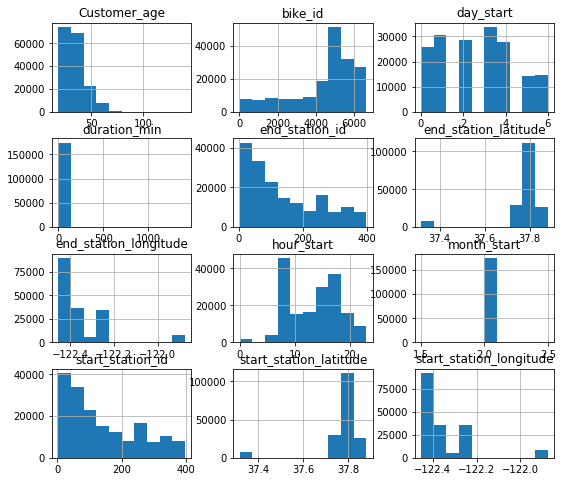

In [27]:
bike2019.hist(figsize=(9,8));

In [28]:
bike2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_min             174952 non-null  float64 
 1   start_station_id         174952 non-null  float64 
 2   start_station_name       174952 non-null  object  
 3   start_station_latitude   174952 non-null  float64 
 4   start_station_longitude  174952 non-null  float64 
 5   end_station_id           174952 non-null  float64 
 6   end_station_name         174952 non-null  object  
 7   end_station_latitude     174952 non-null  float64 
 8   end_station_longitude    174952 non-null  float64 
 9   bike_id                  174952 non-null  int64   
 10  user_type                174952 non-null  object  
 11  member_gender            174952 non-null  object  
 12  bike_share_for_all_trip  174952 non-null  object  
 13  Customer_age             174952 non-null  fl

## The structure of the dataset
There are 174951 bike rides in the dataset with 19 features . Most variables are categorical.

## The main features of interest in my dataset.

I'm most interested in figuring out how does every different biker group (gender, age, custormer-subscriber) behave and how the bike use change through time.

I'll start by looking at the distribution of the main variable of interest: duration

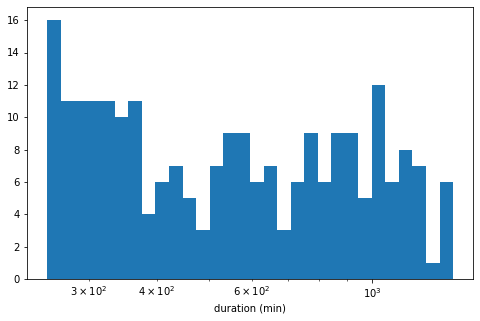

In [29]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(bike2019['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike2019, x = 'duration_min', bins = bins)
plt.xscale('log')

plt.xlabel('duration (min)')
plt.show()

Duration has a long-tailed distribution, with a lot of rides on the short duration end, and few on the long duration end. When plotted on a log-scale, the duration distribution keeps the same shape.

I want to check the duration distribution for the shortest rides

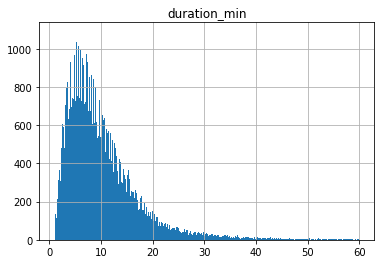

In [30]:
a=bike2019[bike2019['duration_min']<60]
a.hist(['duration_min'],bins = 1000);

* We can see that the majority of the rides are between 3-5 mins

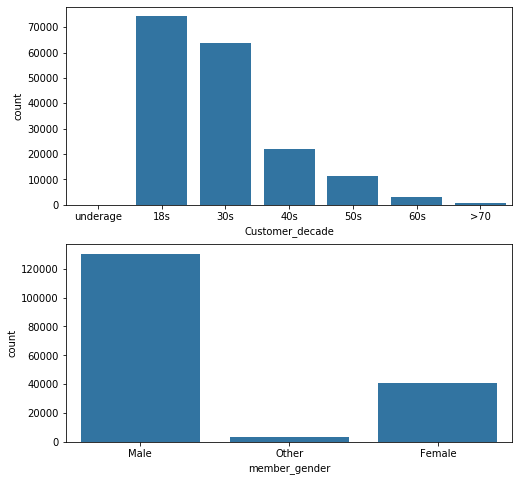

In [31]:
# let's plot all some categorical variables together to get an idea of each  variable's distribution.

fig, ax = plt.subplots(nrows=2, figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = bike2019, x = 'Customer_decade', color = default_color, ax = ax[0])
sb.countplot(data = bike2019, x = 'member_gender', color = default_color, ax = ax[1])

plt.show()

The bikers are generaly young with the majority in their 20s-30s. Additionaly the majority are men.

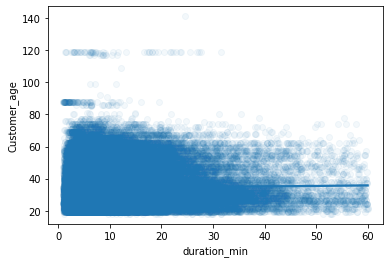

In [32]:
sb.regplot(data=a, x='duration_min',y='Customer_age',scatter_kws={'alpha': 1/20})

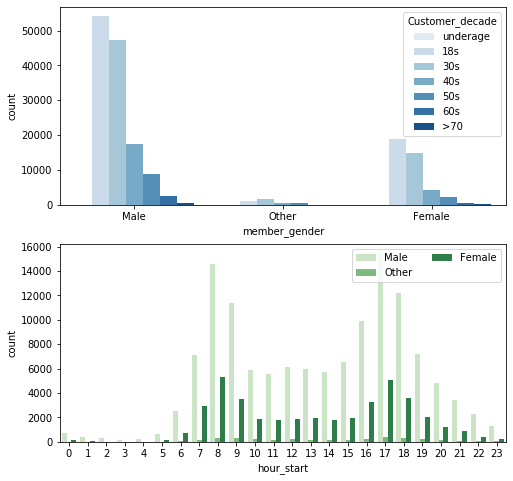

In [33]:
plt.figure(figsize = [8, 8])

# subplot 1: color vs cut
plt.subplot(2, 1, 1)
sb.countplot(data = bike2019, x = 'member_gender', hue = 'Customer_decade', palette = 'Blues')

# subplot 2: clarity vs. cut
ax = plt.subplot(2, 1, 2)
sb.countplot(data = bike2019, x = 'hour_start', hue = 'member_gender', palette = 'Greens')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping



plt.show()

We can see that the majority of riders are at decades 20 and 30.

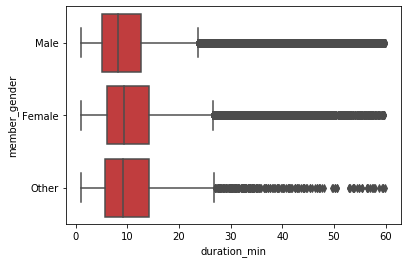

In [34]:
a=bike2019[bike2019['duration_min']<60]
base_color = sb.color_palette()[3]
sb.boxplot(data = a, x='duration_min', y='member_gender', color = base_color);

What is intresting is that the Females have the biggest duration mean on their rides. At the other side, men taking the shortest rides. 

Lets see the same diagramm only for the younger riders.

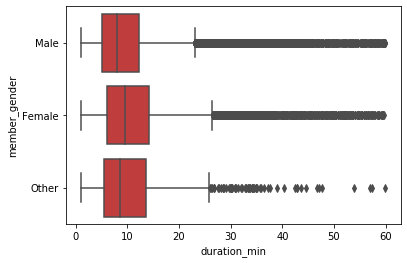

In [35]:
y=a[a['Customer_age']<30]
base_color = sb.color_palette()[3]
sb.boxplot(data = y, x='duration_min', y='member_gender', color = base_color);

Here the differences between the genders are bigger.

We can see the same thing below:

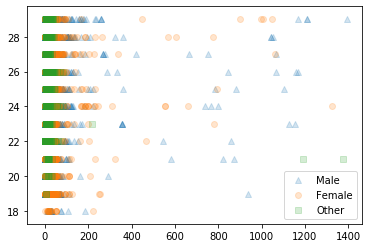

In [36]:
young=bike2019[bike2019['Customer_age']<30]

gender = [['Male', '^'],['Female','o'],
               ['Other', 's']]

for gen, marker in gender:
    df_gender = young[young['member_gender'] == gen]
    plt.scatter(data = df_gender, x = 'duration_min', y = 'Customer_age',
                marker = marker,alpha = 1/5)
    
plt.legend(['Male','Female','Other']);

We can see that the summer months have the longest rides and the October have the more rides.

In [37]:
bike2019['duration_min'].describe(),bike2019['Customer_age'].describe(),bike2019['month_start'].describe()

(count    174952.000000
 mean         11.733379
 std          27.370082
 min           1.016667
 25%           5.383333
 50%           8.500000
 75%          13.150000
 max        1409.133333
 Name: duration_min, dtype: float64,
 count    174952.000000
 mean         34.196865
 std          10.118731
 min          18.000000
 25%          27.000000
 50%          32.000000
 75%          39.000000
 max         141.000000
 Name: Customer_age, dtype: float64,
 count    174952.0
 mean          2.0
 std           0.0
 min           2.0
 25%           2.0
 50%           2.0
 75%           2.0
 max           2.0
 Name: month_start, dtype: float64)

In [38]:
ccounts=bike2019.groupby(['member_gender','Customer_decade']).size()
ccounts = ccounts.reset_index(name = 'count')
ccounts = ccounts.pivot(index = 'Customer_decade', columns = 'member_gender', values = 'count')

The biggest group is "Male riders at their 20s" and the smallest is "Other riders older than 70 years old"

In [39]:
dcounts=bike2019.groupby(['month_start','day_start']).size()
dcounts = dcounts.reset_index(name = 'count')
dcounts = dcounts.pivot(index = 'day_start', columns = 'month_start', values = 'count')

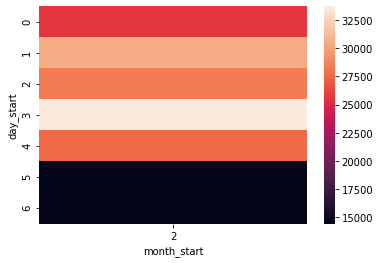

In [40]:
sb.heatmap(dcounts)

* The most crowded days where the Thuesdays and Mondays of October.

In [41]:
hcounts=bike2019.groupby(['day_start','hour_start']).size()
hcounts = hcounts.reset_index(name = 'count')
hcounts = hcounts.pivot(index = 'hour_start', columns = 'day_start', values = 'count')

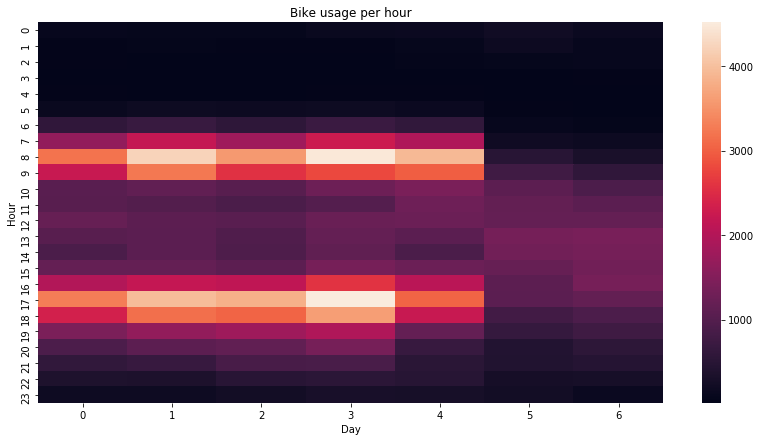

In [42]:
plt.figure(figsize=(14, 7))
b=sb.heatmap(hcounts,square=False)
b.set_title('Bike usage per hour')
b.set_ylabel('Hour')
b.set_xlabel('Day');

We can see that the more rides are on working days at 8:00 and 16:00-17:00. This can lead us to the conclusion that the riders are using their bikes to go to work.  

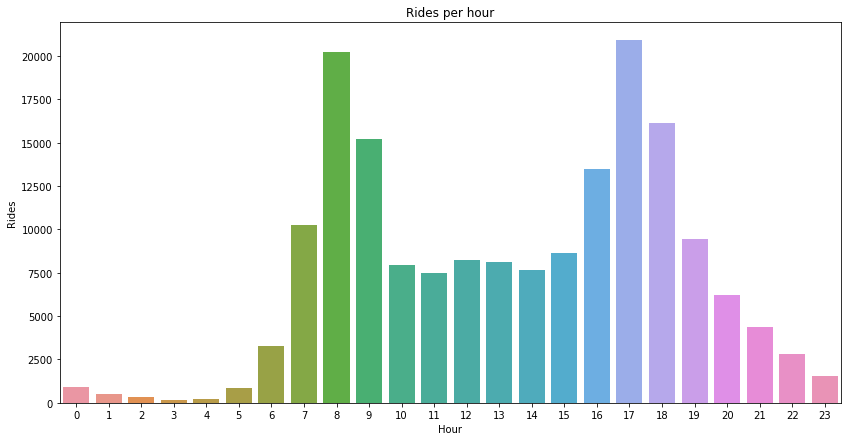

In [43]:
plt.figure(figsize=(14, 7))
mcount=bike2019.groupby('hour_start').size()
mcount = mcount.reset_index(name = 'count')
g=sb.barplot(data = mcount, x = 'hour_start',y='count');
g.set_title('Rides per hour')
g.set_ylabel('Rides')
g.set_xlabel('Hour');

Now lets see the movement per day. I want to take a look how the daily usage is separated on the kind of the client (Subscriber or Customer) and gender.

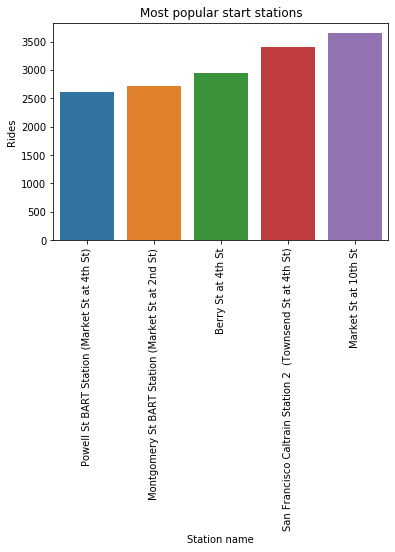

In [47]:
mcount=bike2019.groupby('start_station_name').size().sort_values().tail()
mcount = mcount.reset_index(name = 'count')
pl=sb.barplot(data = mcount, x ='start_station_name',y='count');
pl.set_title('Most popular start stations')
pl.set_ylabel('Rides')
pl.set_xlabel('Station name');
plt.xticks(rotation=90);

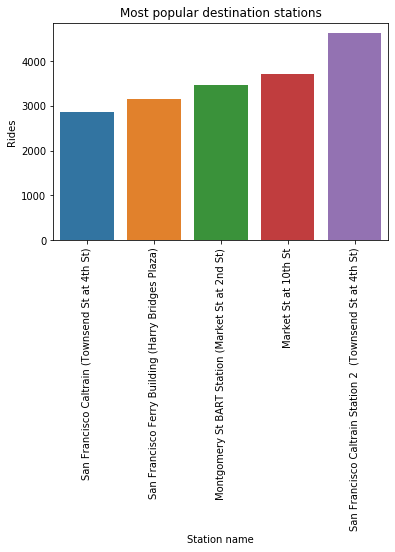

In [48]:
mcount=bike2019.groupby('end_station_name').size().sort_values().tail()
mcount = mcount.reset_index(name = 'count')
pl=sb.barplot(data = mcount, x ='end_station_name',y='count');
pl.set_title('Most popular destination stations')
pl.set_ylabel('Rides')
pl.set_xlabel('Station name');
plt.xticks(rotation=90);

In [49]:
bike2019=pd.read_csv('clean_bikes.csv')